## Using NumPy to perform arithmetic operations on data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Creating an array
a = np.array([1, 2, 3, 4, 5, 6])
print(a)

# Creating a matrix
b = np.array([[10, 20, 30], [40, 50, 60]])
print(b)

[1 2 3 4 5 6]
[[10 20 30]
 [40 50 60]]


In [6]:
# Multiply array by a scalar
result = a * 10
print(result)

[10 20 30 40 50 60]


In [7]:
# Adding arrays
c = np.array([6, 5, 4, 3, 2, 1])
sum_result = a + c
print(sum_result)

[7 7 7 7 7 7]


In [8]:
# Generating random numbers
np.random.seed(0)  # For reproducibility
random_values = np.random.randn(6)
print(random_values)

# Creating a sequential array
sequence = np.arange(1, 10, 2)  # Start, Stop (exclusive), Step
print(sequence)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788]
[1 3 5 7 9]


In [9]:
# Sample dataset
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)

# Column-wise sum
print(df.sum())

# Row-wise sum
print(df.sum(axis=1))

A    10
B    26
dtype: int64
0     6
1     8
2    10
3    12
dtype: int64


In [10]:
# Calculate mean and median
print("Mean:\n", df.mean())
print("Median:\n", df.median())

Mean:
 A    2.5
B    6.5
dtype: float64
Median:
 A    2.5
B    6.5
dtype: float64


In [11]:
# Summary statistics
print(df.describe())

              A         B
count  4.000000  4.000000
mean   2.500000  6.500000
std    1.290994  1.290994
min    1.000000  5.000000
25%    1.750000  5.750000
50%    2.500000  6.500000
75%    3.250000  7.250000
max    4.000000  8.000000


In [12]:
# Load the mtcars dataset from seaborn's built-in datasets
mtcars = sns.load_dataset('mpg')  # Seaborn has mpg, similar to mtcars
mtcars = mtcars.dropna()  # Drop missing values for simplicity

# Display a preview
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
# Count the number of cars by transmission type
transmission_counts = mtcars['origin'].value_counts()
transmission_counts

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [14]:
# Average miles per gallon (mpg) by number of gears
mpg_by_origin = mtcars.groupby('origin')['mpg'].mean()
mpg_by_origin

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

In [15]:
# Crosstab of cylinders and origin
cylinders_vs_origin = pd.crosstab(mtcars['cylinders'], mtcars['origin'])
cylinders_vs_origin

origin,europe,japan,usa
cylinders,,,
3,0,4,0
4,61,69,69
5,3,0,0
6,4,6,73
8,0,0,103


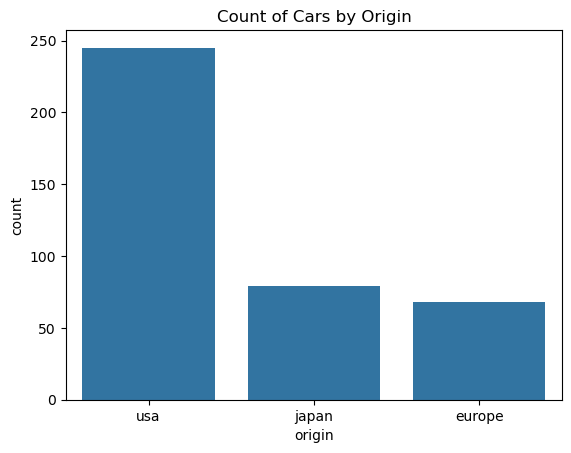

In [16]:
import matplotlib.pyplot as plt

# Count plot for car origins
sns.countplot(x='origin', data=mtcars)
plt.title("Count of Cars by Origin")
plt.show()

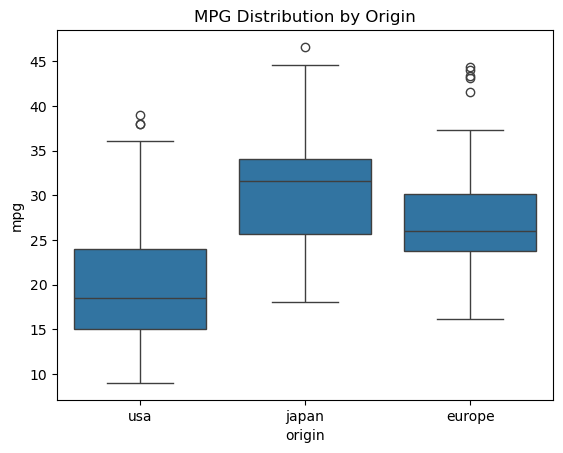

In [17]:
# Box plot of mpg grouped by origin
sns.boxplot(x='origin', y='mpg', data=mtcars)
plt.title("MPG Distribution by Origin")
plt.show()

In [18]:
# Convert 'cylinders' to a categorical variable
mtcars['cylinders'] = mtcars['cylinders'].astype('category')

# Verify the conversion
print(mtcars['cylinders'].dtypes)

category


In [19]:
# Load the dataset
mtcars = sns.load_dataset('mpg').dropna()  # Clean missing values for simplicity

# Display the first few rows
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
# Compute the Pearson correlation matrix
correlation_matrix = mtcars[['mpg', 'horsepower', 'weight']].corr()
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
                 mpg  horsepower    weight
mpg         1.000000   -0.778427 -0.832244
horsepower -0.778427    1.000000  0.864538
weight     -0.832244    0.864538  1.000000


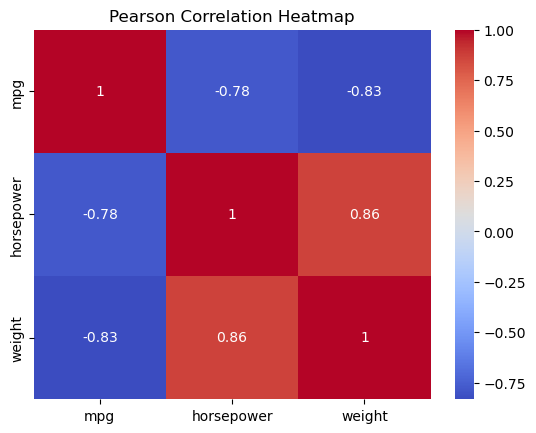

In [21]:
# Plot a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

In [22]:
from scipy.stats import spearmanr

# Calculate Spearman correlation for mpg and weight
spearman_corr, _ = spearmanr(mtcars['mpg'], mtcars['weight'])
print(f"Spearman Correlation (mpg vs weight): {spearman_corr:.3f}")

Spearman Correlation (mpg vs weight): -0.876


In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(mtcars['origin'], mtcars['cylinders'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.3f}, p-value: {p:.3f}")

Chi-Square Statistic: 180.719, p-value: 0.000


## Outlier Detection

In [24]:
# Load the dataset
mtcars = sns.load_dataset('mpg').dropna()

# Calculate IQR for mpg
Q1 = mtcars['mpg'].quantile(0.25)
Q3 = mtcars['mpg'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = mtcars[(mtcars['mpg'] < lower_bound) | (mtcars['mpg'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, name]
Index: []


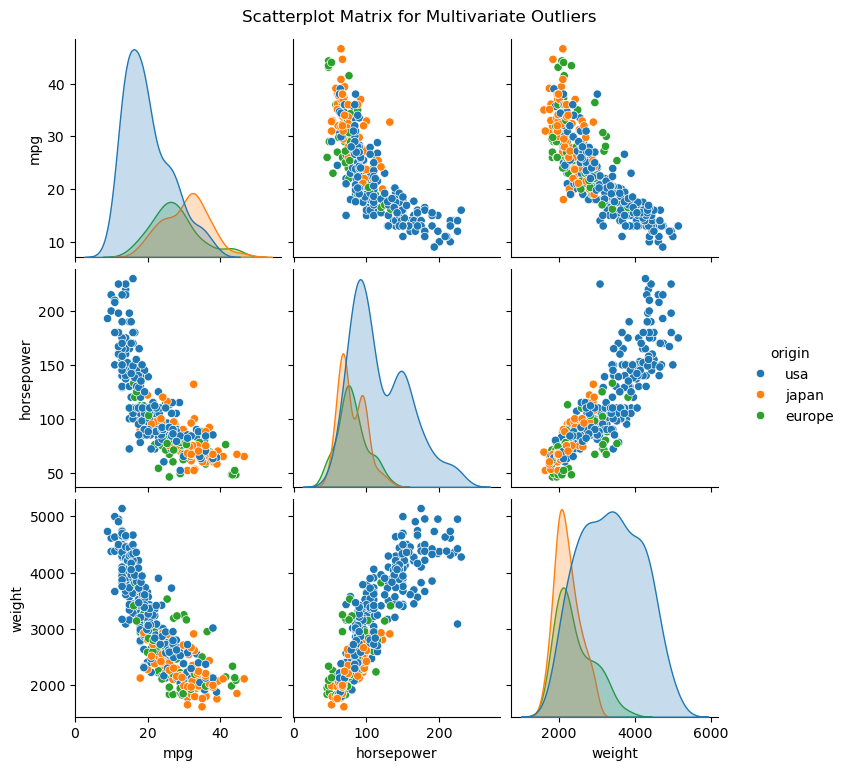

In [25]:
# Generate the pair plot
pairplot = sns.pairplot(mtcars, vars=['mpg', 'horsepower', 'weight'], hue='origin')

# Add a title to the plot
plt.suptitle("Scatterplot Matrix for Multivariate Outliers", y=1.02)  # Adjust `y` for positioning
plt.show()